In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report , confusion_matrix


In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df = df.drop(['deck','who','embark_town','alive','adult_male','alone'],axis = 1)
X = df.drop('survived',axis = 1)
y = df['survived']

In [12]:
numerical_features = X.select_dtypes(include = np.number).columns.tolist()
categorical_features = X.select_dtypes(include = 'object').columns.tolist()

In [14]:
numerical_transformer = Pipeline(steps = [
  ('imputer',SimpleImputer(strategy = 'median')),
  ('scaler',StandardScaler())
])

categorical_transformer = Pipeline(steps = [
  ('imputer',SimpleImputer(strategy = 'most_frequent')),
  ('onehot',OneHotEncoder(handle_unknown = 'ignore'))
])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    

    
print("\nApplying preprocessing...")
X_processed = preprocessor.fit_transform(X)
print("Preprocessing complete.")


Applying preprocessing...
Preprocessing complete.


In [17]:
feature_names = numerical_features + \
                preprocessor.named_transformers_['cat']['onehot'] \
                .get_feature_names_out(categorical_features).tolist()

print(f"\nShape of processed features: {X_processed.shape}")


Shape of processed features: (891, 10)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Data split into training and testing sets:
X_train shape: (712, 10), y_train shape: (712,)
X_test shape: (179, 10), y_test shape: (179,)


In [19]:
print("\nTraining Gradient Boosting Classifier...")
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
print("Training complete.")


Training Gradient Boosting Classifier...
Training complete.



Evaluating the model...

Accuracy: 0.8212

Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.82      0.90      0.85       105
       Survived       0.83      0.72      0.77        74

       accuracy                           0.82       179
      macro avg       0.82      0.81      0.81       179
   weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
[[94 11]
 [21 53]]


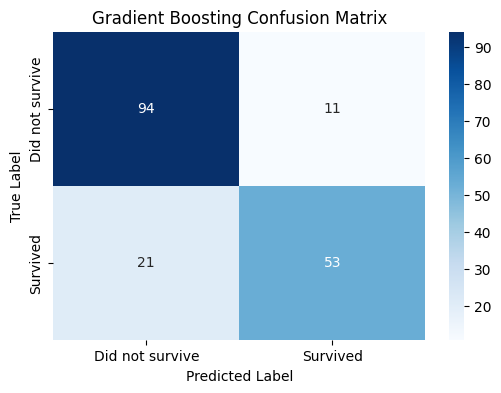

In [20]:
print("\nEvaluating the model...")
y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived'])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not survive', 'Survived'],
            yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()